In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Note: This notebook was based on original outputs, that helped tweak some hyperparameters so this isn't reproducable, but I left it in to explain the process

embeddings = np.load("../output/sentence_embeddings.npy")

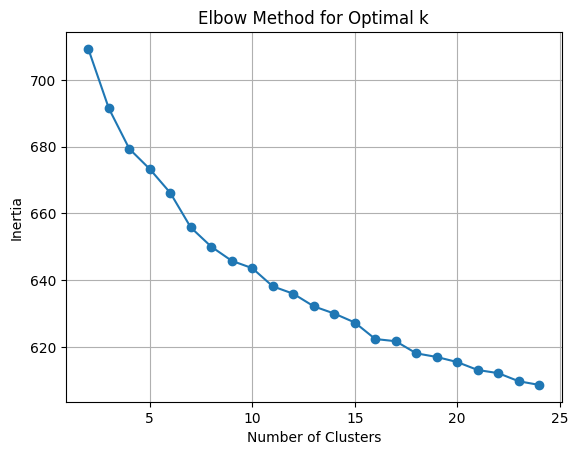

In [6]:
inertias = []
k_range = range(2, 25)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(embeddings)
    inertias.append(km.inertia_)

plt.plot(k_range, inertias, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

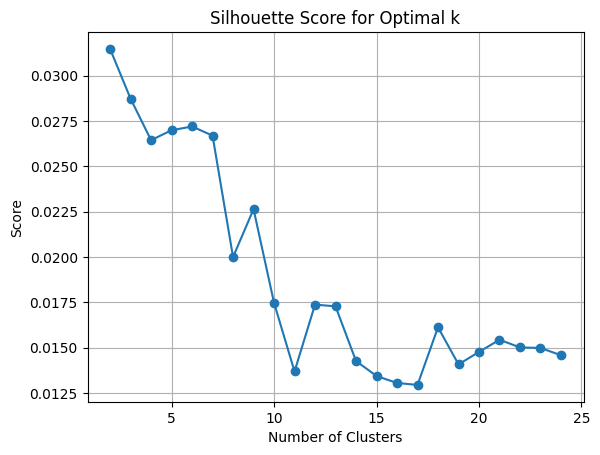

In [8]:
from sklearn.metrics import silhouette_score
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42).fit(embeddings)
    score = silhouette_score(embeddings, km.labels_)
    scores.append(score)

plt.plot(k_range, scores, marker="o")
plt.title("Silhouette Score for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.grid(True)
plt.show()

Looks like around 7 clusters is ideal